In [78]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

In [79]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [80]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [81]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [82]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

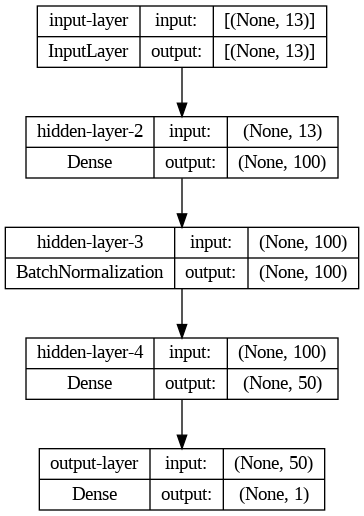

In [83]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer-2 (Dense)      (None, 100)               1400      
                                                                 
 hidden-layer-3 (BatchNorma  (None, 100)               400       
 lization)                                                       
                                                                 
 hidden-layer-4 (Dense)      (None, 50)                5050      
                                                                 
 output-layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 6901 (26.96 KB)
Trainable params: 6701 (26.18 KB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________


In [85]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [86]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
13/13 [==============================] - 1s 19ms/step - loss: 547.4023 - mae: 22.2460 - val_loss: 547.9454 - val_mae: 22.4045
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 512.0266 - mae: 21.8678 - val_loss: 515.2147 - val_mae: 21.8315
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 486.7378 - mae: 21.3847 - val_loss: 483.6650 - val_mae: 21.1841
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 455.7505 - mae: 20.6877 - val_loss: 445.5736 - val_mae: 20.3762
Epoch 5/20
13/13 [==============================] - 0s 8ms/step - loss: 415.7415 - mae: 19.7080 - val_loss: 396.6195 - val_mae: 19.1084
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 356.7561 - mae: 18.1634 - val_loss: 326.6593 - val_mae: 17.1848
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 274.3563 - mae: 15.7496 - val_loss: 231.4309 - val_mae: 14.1181
Epoch 8/20
13/13 [=============================

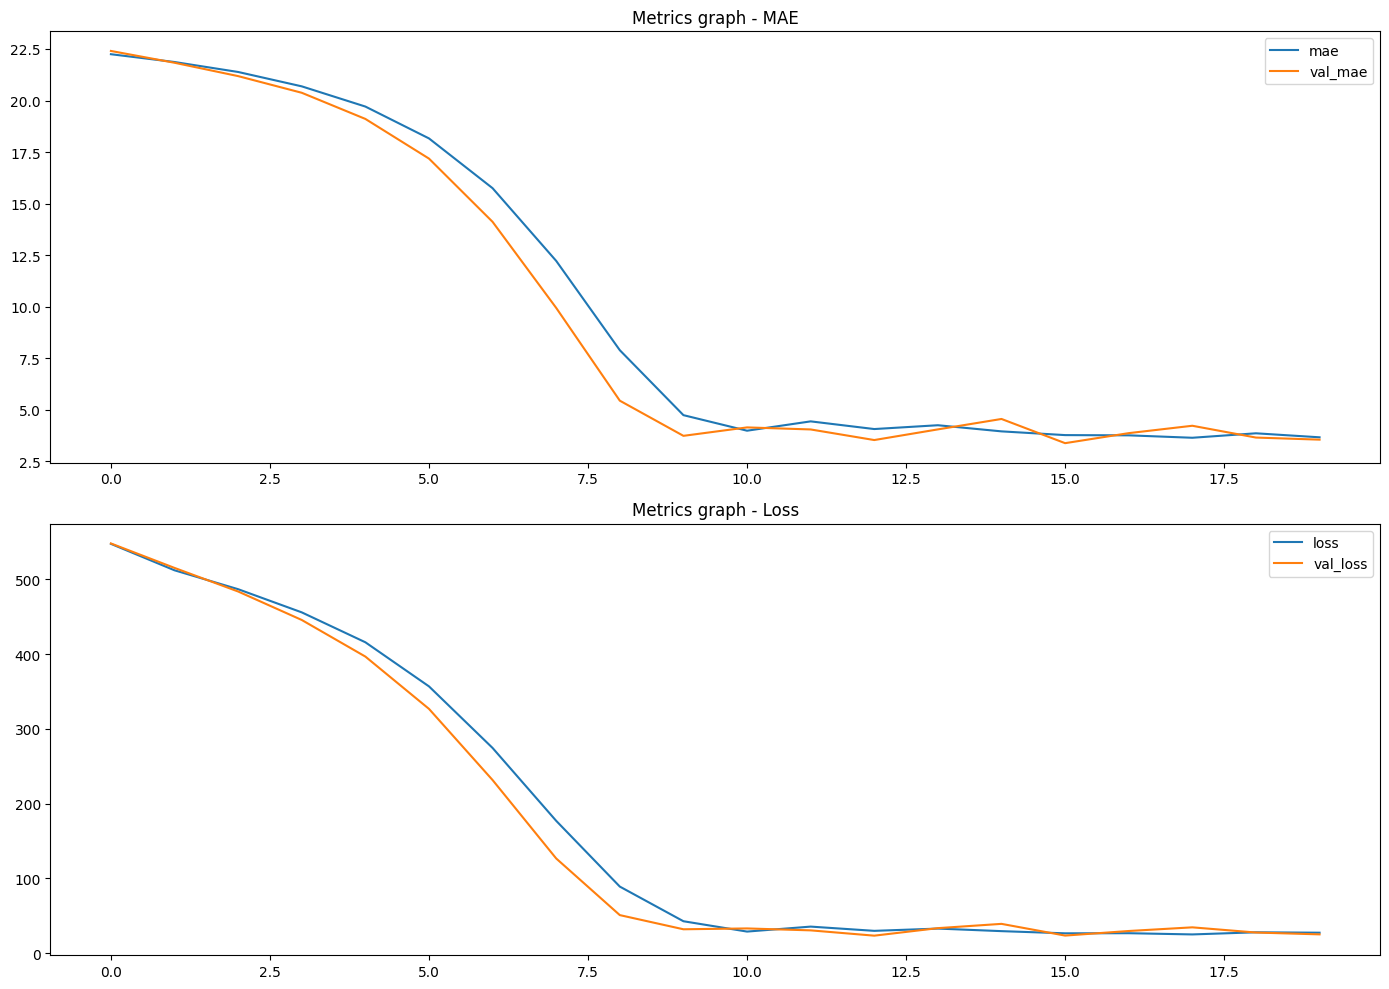

In [87]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
pd.DataFrame({"mae": history.history["mae"], "val_mae": history.history["val_mae"]}).plot(ax=plt.gca())
plt.title("Metrics graph - MAE")


plt.subplot(2, 1, 2)
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot(ax=plt.gca())
plt.title("Metrics graph - Loss")

plt.tight_layout()
plt.show()

In [88]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


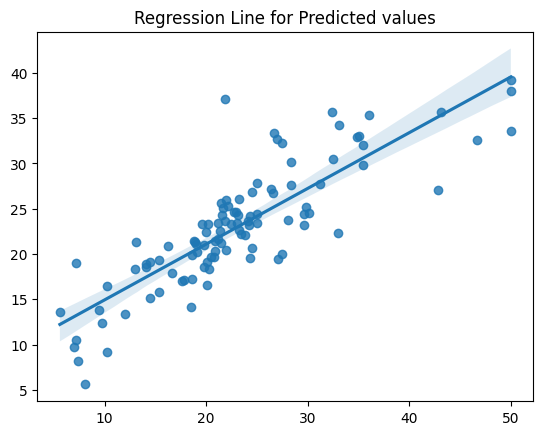

In [89]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [90]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [91]:
regression_metrics_display(y_test, y_pred)

MAE is 3.557496985267191
MSE is 25.021522540081676
R2 score is 0.6994189602595062
